<a href="https://colab.research.google.com/github/aditya248/scotch-review-nlp/blob/main/scotch_nlp_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading dataset into the environment
scotch_dataset = pd.read_csv("https://raw.githubusercontent.com/aditya248/scotch-review-nlp/main/scotch_review2020.csv")
scotch_dataset.sample(3)

,id,name,category,review.point,price,currency,description.1.2247.
967,968,"Arran 18 year old, 46%",Single Malt Scotch,89,100,$,Unusually named—it refers to the price paid fo...
626,627,"Berry Bros. & Rudd, distilled at Balmenach, 19...",Single Malt Scotch,90,232,$,If every fan of sherried whisky has a favorite...
578,579,"Signatory (distilled at Brora), 24 year old, 1...",Single Malt Scotch,90,225,$,\r\n\r\nFruit and grain drive this solid sippe...


## Data Cleaning

In [ ]:
scotch_dataset.shape

(2247, 7)

In [ ]:
scotch_dataset.columns

Index(['id', 'name', 'category', 'review.point', 'price', 'currency',
       'description.1.2247.'],
      dtype='object')

In [ ]:
# check column types
scotch_dataset.dtypes

id                      int64
name                   object
category               object
review.point            int64
price                  object
currency               object
description.1.2247.    object
dtype: object

In [ ]:
# Clean price column price and change type.
pattern = r'[A-Za-z]'
scotch_dataset[scotch_dataset['price'].str.contains(pattern)]['price']

33      15,000 or $60,000/set
92                 150/375ml.
94                  50/375ml.
186                60,000/set
359                 50/375ml.
739                60,000/set
778                100/375ml.
1010                 44/liter
1280               132/700ml.
1548               60,000/set
1814               60,000/set
1825            39/1.75 liter
2027                 35/liter
2200            18/1.75 liter
Name: price, dtype: object

In [ ]:
scotch_dataset.iloc[33,4] = '15000'
scotch_dataset['price'].replace(',', '', inplace = True, regex = True)
scotch_dataset['price'] = scotch_dataset['price'].map(lambda x: x.split('/')[0])

In [ ]:
scotch_dataset['price'] = scotch_dataset['price'].astype('float')

In [ ]:
###### price per point
# scotch_dataset['price_per_point'] = scotch_dataset['price']/scotch_dataset['points']
# scotch_dataset.head()

In [ ]:
# Change type for 
scotch_dataset['review.point'] = scotch_dataset['review.point'].astype('int')

In [ ]:
# check for duplicates
scotch_dataset.duplicated().sum()

0

In [ ]:
# check for null values
scotch_dataset.isna().sum()

id                      0
name                    0
category                0
review.point            0
price                   0
currency                0
description.1.2247.    39
dtype: int64

In [ ]:
# drop 39 null or na values
scotch_dataset.dropna(inplace=True)
scotch_dataset.isna().sum()

id                     0
name                   0
category               0
review.point           0
price                  0
currency               0
description.1.2247.    0
dtype: int64

In [ ]:
scotch_dataset[scotch_dataset['name'].duplicated() == True]

,id,name,category,review.point,price,currency,description.1.2247.
108,109,"Benriach The Smoky Twelve, 46%",Single Malt Scotch,94,65.0,$,\r\n\r\nLet this whisky glide into your glass ...
192,193,"Laphroaig Triple Wood, 48%",Single Malt Scotch,93,70.0,$,Aged in a European oak oloroso sherry hogshead...
199,200,Laphroaig 10 year old Cask Strength (Batch 010...,Single Malt Scotch,93,70.0,$,"Initially matured in bourbon barrels, then tra..."
202,203,"Compass Box Spice Tree Extravaganza, 46%",Blended Malt Scotch Whisky,93,140.0,$,"The nose offers canned peach halves in syrup, ..."
215,216,"Glenlivet Enigma, 60.6%",Single Malt Scotch,93,149.0,$,This presents a mellow bouquet of rich dried f...
217,218,Aberlour A’bunadh Alba Cask Strength (Batch #0...,Single Malt Scotch,93,90.0,$,"The yin to Aberlour A’bunadh’s yang, this cask..."
231,232,"Compass Box The Peat Monster, 46%",Blended Malt Scotch Whisky,93,65.0,$,An exceptional blend from first-fill American ...
232,233,Aberfeldy 18 year old French Red Wine Cask-Fin...,Single Malt Scotch,93,120.0,$,"Perfumed on the nose, with fresh-cut flowers, ..."
315,316,"Tamdhu Batch Strength (#002), 58.5%",Single Malt Scotch,92,90.0,$,"It rarely gets better than this. Vanilla, almo..."
324,325,"Longrow 18 year old, 46%",Single Malt Scotch,92,220.0,$,This 42 year old expression was matured in a s...


In [ ]:
# check for duplicate name
scotch_dataset['name'].duplicated().sum()

57

In [ ]:
# Merge duplicate name with joing the review and taking mean for other columns.
scotch_dataset['review.point'] = scotch_dataset.groupby('name')['review.point'].transform('mean')
scotch_dataset['price'] = scotch_dataset.groupby('name')['price'].transform('mean')
scotch_dataset['description.1.2247.'] = scotch_dataset.groupby('name')['description.1.2247.'].transform(lambda x: ','.join(x))

In [ ]:
# Drop the duplicate columns (keep the first each time)
scotch_dataset.drop_duplicates(subset=['name'], keep='first', inplace=True)

In [ ]:
# Extract new features
scotch_dataset['alcohol'] = scotch_dataset['name'].str.extract(r"([\(\,\,\'\"\’\”\$] ? ?\d+(\.\d+)?%)")[0]
scotch_dataset['alcohol'] = scotch_dataset['alcohol'].str.replace("[^\d\.]", "").astype(float)

In [ ]:
scotch_dataset['alcohol']

0       40.5
1       42.9
2       40.0
3       50.8
4       45.4
        ... 
2242    46.0
2243     NaN
2244    50.0
2245    40.0
2246    55.3
Name: alcohol, Length: 2151, dtype: float64

In [ ]:
scotch_dataset['alcohol'] = scotch_dataset['alcohol'].fillna(scotch_dataset['alcohol'].mean())

In [ ]:
scotch_dataset.isna().sum()

id                     0
name                   0
category               0
review.point           0
price                  0
currency               0
description.1.2247.    0
alcohol                0
dtype: int64

In [ ]:
# drop redundant columns
scotch_dataset.drop(columns=['currency', 'id'], inplace=True)

In [ ]:
scotch_dataset = scotch_dataset.rename(columns={'description.1.2247.': 'review_description'})

In [ ]:
df = scotch_dataset.copy()

In [ ]:
df.sample(3)

,id,name,category,review.point,price,currency,review_description
2116,2117,"Sir Edward’s 12 year old Blended Whisky, 40%",Blended Scotch Whisky,84,22,$,Matured exclusively in ex-bourbon barrels (Ame...
331,332,"Glengoyne 30 year old (2017 Edition), 46.8%",Single Malt Scotch,92,800,$,Sandy Hyslop has excelled at solely blending E...
366,367,"Bunnahabhain 18 year old, 46.3%",Single Malt Scotch,92,140,$,"Mango, candied orange peel, coriander seed, cr..."


## EDA

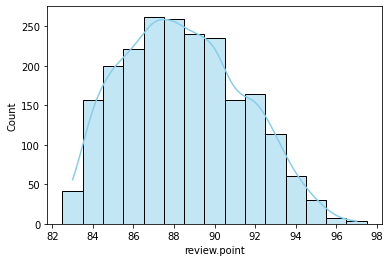

In [ ]:
sns.histplot(data=df, x="review.point",kde=True, discrete = True, color='skyblue')


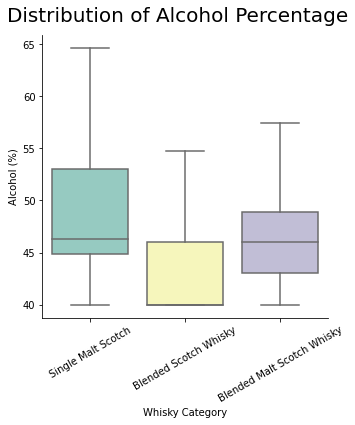

In [ ]:
g2 = sns.catplot(x="category", y = 'alcohol', data=df,
            kind="box", palette = sns.color_palette('Set3'), sym = '')
g2.fig.suptitle("Distribution of Alcohol Percentage",
                  fontsize=20, fontdict={"weight": "bold"})
g2.fig.subplots_adjust(top=0.9)
g2.set_xticklabels(rotation = 30)
g2.set(xlabel = 'Whisky Category', ylabel= 'Alcohol (%)')


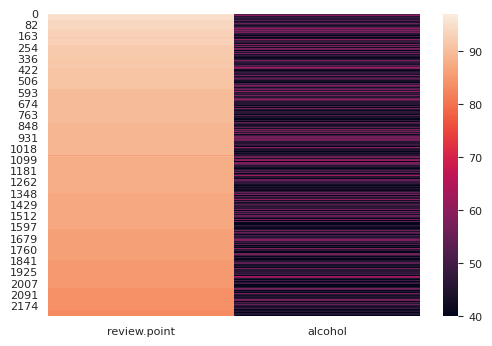

In [ ]:
df1 = df.drop(columns=['name', 'category', 'price', 'review_description'])
sns.heatmap(df1)

## Alex EDA

In [ ]:
# SweetViz for EDA
!pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(scotch_dataset)
#display the report
advert_report.show_html('Scotch_Dataset_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Scotch_Dataset_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)
#display the report
advert_report.show_html('Advertising.html')

In [ ]:
# Compare() function of Sweetviz is used for comparison of the dataset.
scotch_compare = sv.compare(scotch_dataset[100:], scotch_dataset[:100])
scotch_compare.show_html('Compare.html')

Text(0, 0.5, 'Number of Whiskys Receiving Grade')

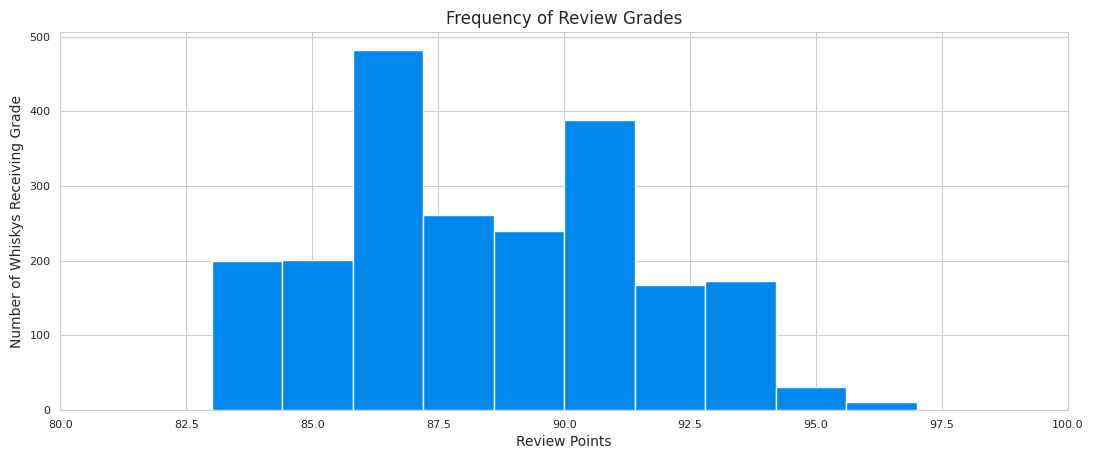

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 5))
review_points = scotch_dataset['review.point'].plot(kind='hist',figsize = (13, 5),title="Frequency of Review Grades")
plt.xlim(80, 100)
review_points.set_xlabel("Review Points")
review_points.set_ylabel("Number of Whiskys Receiving Grade")

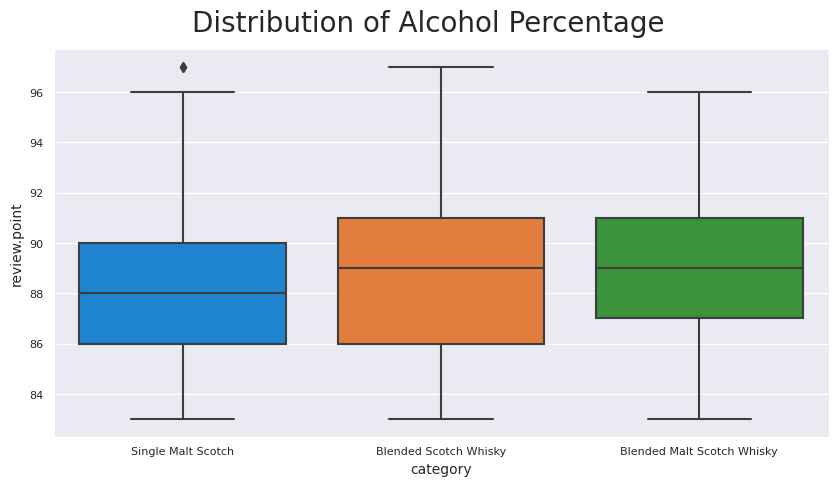

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.suptitle("Distribution of Alcohol Percentage", fontsize=20, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)
plt.xlabel = 'Whisky Category'
plt.ylabel= 'Alcohol (%)'
sns.boxplot(x="category", y="review.point", data=scotch_dataset)

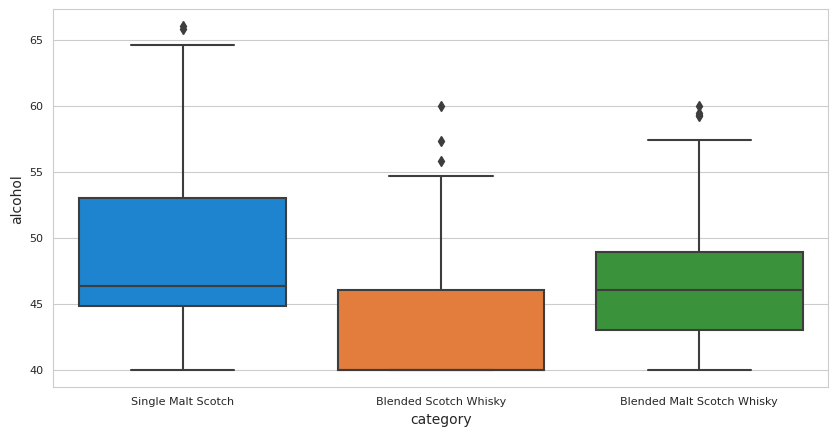

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.boxplot(x="category", y="alcohol", data=scotch_dataset)

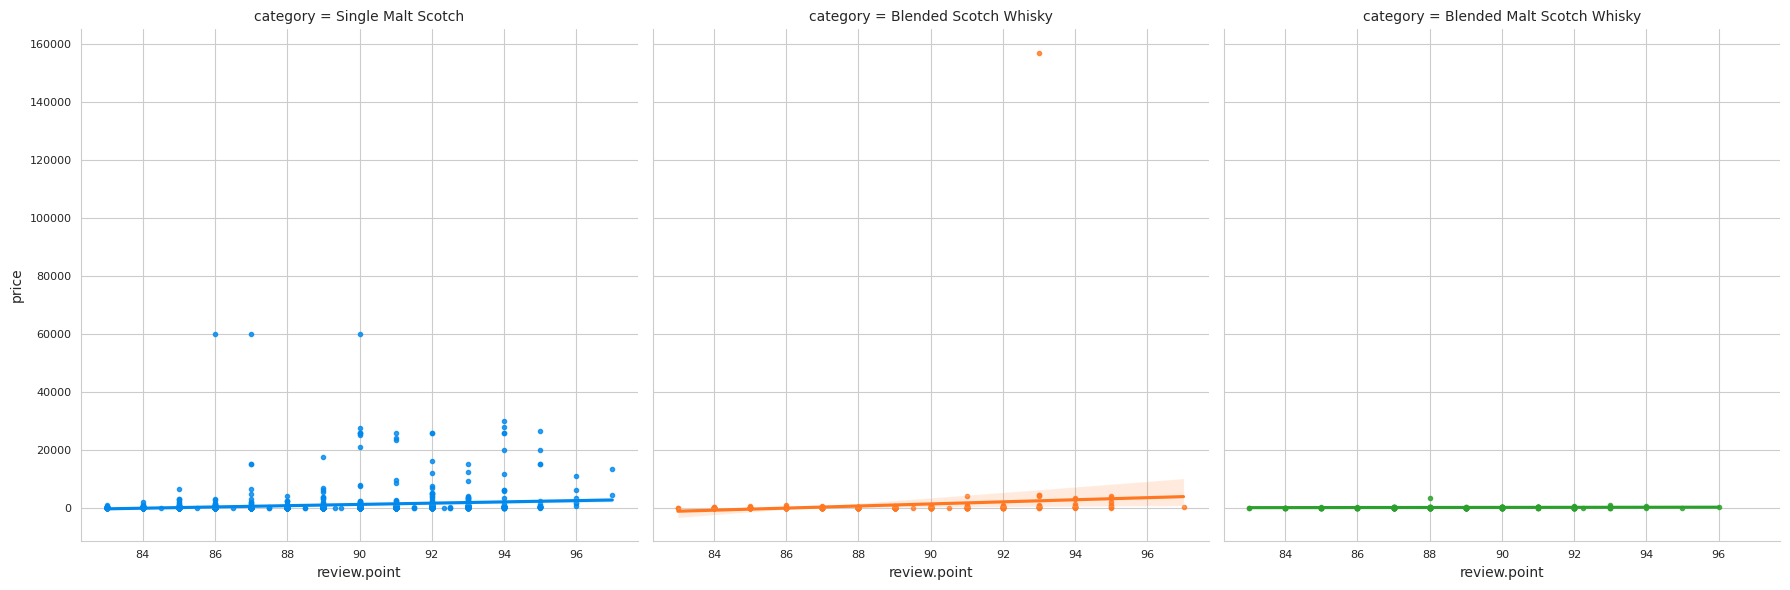

In [ ]:
sns.lmplot(x="review.point", y="price",  col="category",hue="category", data=scotch_dataset, height=6)

In [ ]:
# Rafi's EDA
group_by_category = scotch_dataset.groupby(by=['category'])
scotch_dataset_data_avg = group_by_category.mean()
scotch_dataset_data_count = group_by_category.count()

In [ ]:
scotch_dataset_data_count_series = scotch_dataset_data_count.iloc[:,0]
features_of_interest = pd.DataFrame({'prices': scotch_dataset_data_avg['price'], 'availability': car_data_count_series})
alternative_method = scotch_dataset_data_avg.merge(scotch_dataset_data_count, left_index=True, right_index=True, suffixes=['_avg','_count'])
alternative_method[['price', 'name']].sort_values(by=['price', 'name'], ascending=True).plot(kind='barh')

KeyError: ignored